## Linear Regression - Project

Got a contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
customers = pd.read_csv("Ecommerce Customers")

In [70]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [71]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [72]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [73]:
#sns.set_palette("GnBu_d")
sns.set_palette("hls")
sns.set_style('whitegrid')

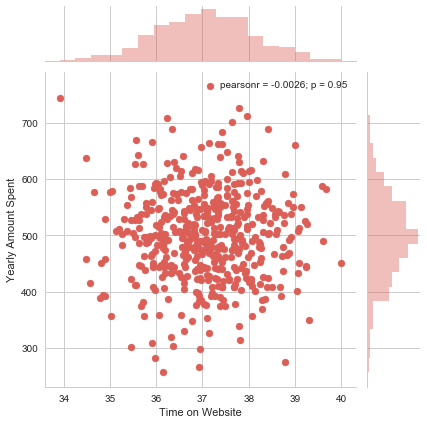

In [74]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

In [75]:
#sns.set_palette("Greens")
sns.set_palette("PuBuGn_d")

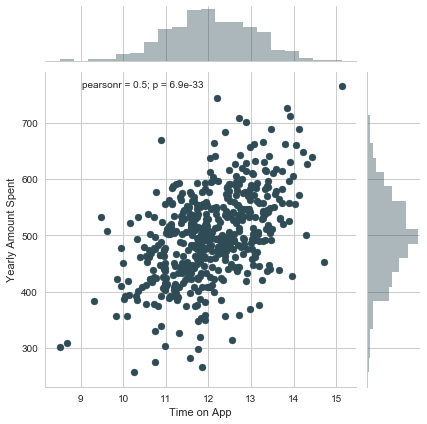

In [76]:
#sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers, kind='hex')
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

In [77]:
sns.set_palette("husl")

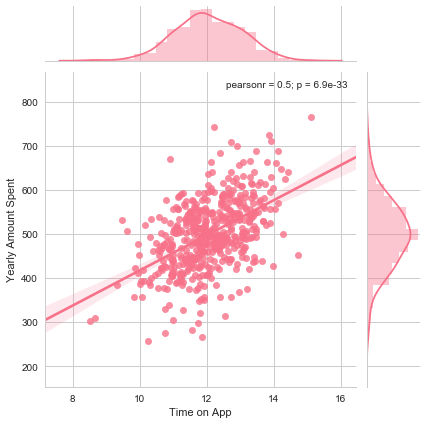

In [78]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers, kind='reg')

In [79]:
#sns.pairplot(customers,hue='Time on Website',palette='coolwarm')

In [80]:
#sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,kde=False,bins=30, kind='scatter')

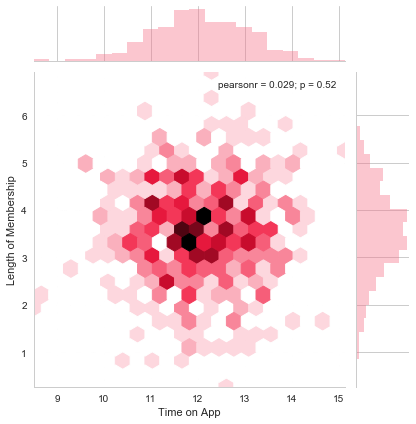

In [81]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

In [82]:
sns.set_palette("GnBu_d")

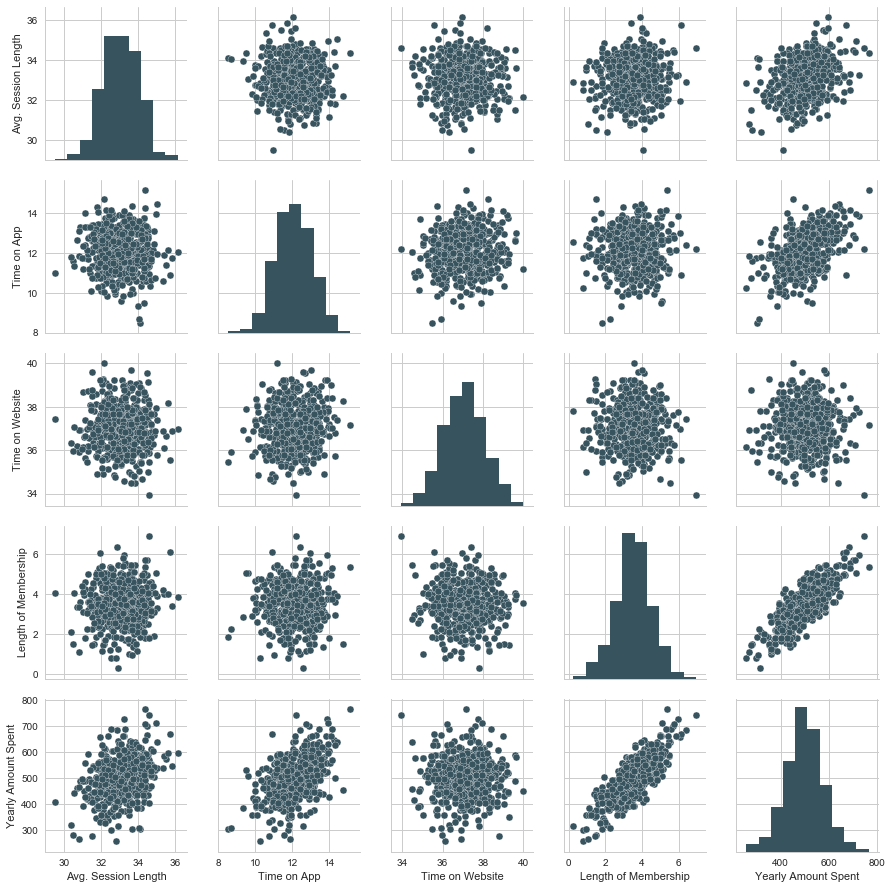

In [83]:
sns.pairplot(customers,palette='coolwarm')

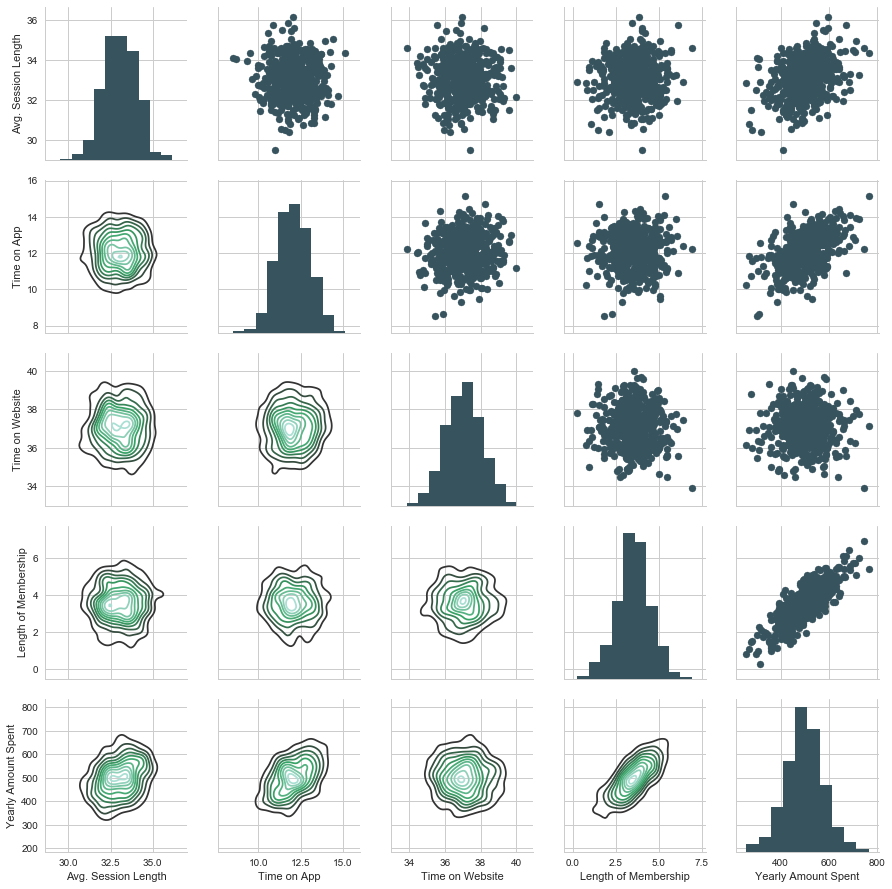

In [84]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(customers)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

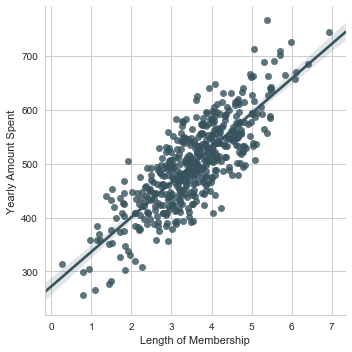

In [85]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [86]:
#sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers,hue='Time on App',palette='coolwarm')

In [87]:
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize #fmin_cg to train the linear regression

import warnings
warnings.filterwarnings('ignore')

#customers = scipy.io.loadcustomers( datafile )
#Training set
X, y = customers['X'], customers['y']
##Cross validation set
Xval, yval = customers['Xval'], customers['yval']
##Test set
Xtest, ytest = customers['Xtest'], customers['ytest']
##Insert a column of 1's to all of the X's, as usual
X =     np.insert(X    ,0,1,axis=1)
Xval =  np.insert(Xval ,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)

def plotData():
    plt.figure(figsize=(8,5))
    plt.ylabel('Yearly Amount Spent (y)')
    plt.xlabel('Length of Membership (x)')
    plt.plot(X[:,1],y,'rx')
    plt.grid(True)
    
plotData()

In [88]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [89]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [90]:
y = ['Yearly Amount Spent']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 101)

ValueError: Found input variables with inconsistent numbers of samples: [500, 1]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

In [66]:
print('Coefficients: \n', lm.coef_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [67]:
predictions = lm.predict( X_test)

NameError: name 'X_test' is not defined

In [88]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

NameError: name 'y_test' is not defined

In [89]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

NameError: name 'y_test' is not defined

In [90]:
sns.distplot((y_test-predictions),bins=50);

NameError: name 'y_test' is not defined

In [91]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

AttributeError: 'LinearRegression' object has no attribute 'coef_'